<h1> Imports </h1>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

<h1> Dataset analysis and exploration (first look) </h1>

Description of attributes:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

In [39]:
# Import dataset

dataset_raw = pd.read_csv("spotify-2023.csv", encoding='latin-1')
dataset_raw.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [40]:
dataset_raw.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [41]:
dataset_raw.shape

(953, 24)

In [42]:
dataset_raw.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Purpose: assess which conditions (bpm, danceability, valence, energy, etc.) leads to higher popularity (e.g. in_spotify_playlists)

<h1> Dataset preprocessing </h1>

<h2> Solve missing or invalid values </h2>

In [43]:
from datetime import datetime
    
is_number = lambda value_in: isinstance(value_in, (int, float))
is_int = lambda value_in: isinstance(value_in, int)
is_natural = lambda value_in: is_int(value_in) and value_in >= 0
is_positive = lambda value_in: is_int(value_in) and value_in > 0
is_percent = lambda value_in: (is_number(value_in) and value_in >= 0 and value_in <= 100)
def is_valid_date(year, month, day):
    try:
        datetime(year, month, day)
        return True
    except ValueError:
        return False
is_string = lambda value_in: isinstance(value_in, str)
is_not_empty_string = lambda value_in: is_string(value_in) and len(value_in) > 0   
def convert_string_to_number(s):
    try:
        number = float(s.replace(",", ""))
        if number.is_integer():
            return int(number)
        else:
            return number
    except ValueError:
        return None
def is_string_natural(value_in):
    temp_value = None
    if is_string(value_in):
        temp_value = convert_string_to_number(value_in)        
    return True if (temp_value is not None and is_natural(temp_value)) else False

is_valid_track_name = lambda track_name: is_not_empty_string(track_name)
is_valid_artist_name = lambda artist_name: is_not_empty_string(artist_name)
is_valid_artist_count = lambda artist_count: is_positive(artist_count)
is_valid_released_date = lambda year, month, day: is_valid_date(year, month, day)
is_valid_in_spotify_playlists = lambda value: is_natural(value) or is_string_natural(value)
is_valid_in_spotify_charts = lambda value: is_natural(value) or is_string_natural(value)
is_valid_streams = lambda value: is_string_natural(value) or is_natural(value)
is_valid_in_apple_playlists = lambda value: is_natural(value) or is_string_natural(value)
is_valid_in_apple_charts = lambda value: is_natural(value) or is_string_natural(value)
is_valid_in_deezer_playlists = lambda value: is_natural(value) or is_string_natural(value)
is_valid_in_deezer_charts = lambda value: is_natural(value) or is_string_natural(value)
is_valid_in_shazam_charts = lambda value: is_natural(value) or is_string_natural(value)
is_valid_bpm = lambda bpm: is_positive(bpm) and bpm <= 300
def is_valid_key(key):
    valid_keys = ['A', 'A#', 'B', 'B#', 'C', 'C#', 'D', 'D#', 'E', 'E#', 'F', 'F#', 'G', 'G#']
    return True if (is_not_empty_string(key) and key in valid_keys) else False
def is_valid_mode(mode):
    valid_modes = ['minor', 'major']
    return True if (is_not_empty_string(mode) and mode.lower() in valid_modes ) else False
is_valid_danceability_percent = lambda value: is_percent(value)
is_valid_valence_percent = lambda value: is_percent(value)
is_valid_energy_percent = lambda value: is_percent(value)
is_valid_acousticness_percent = lambda value: is_percent(value)
is_valid_instrumentalness_percent = lambda value: is_percent(value)
is_valid_liveness_percent = lambda value: is_percent(value)
is_valid_speechiness_percent = lambda value: is_percent(value)

def add_bad_param(invalid_params_dict, attribute, sample):
    ext_key = attribute
    int_key = sample[attribute]
    if not ext_key in invalid_params_dict.keys():
        invalid_params_dict[ext_key] = {}
    if not int_key in invalid_params_dict[ext_key]:
        invalid_params_dict[ext_key][int_key] = 0
    invalid_params_dict[ext_key][int_key] += 1

def is_valid_sample(sample, invalid_params_dict):
    if not is_valid_track_name(sample['track_name']):                       add_bad_param(invalid_params_dict, 'track_name', sample)
    if not is_valid_artist_name(sample['artist(s)_name']):                  add_bad_param(invalid_params_dict, 'artist(s)_name', sample)
    if not is_valid_artist_count(sample['artist_count']):                   add_bad_param(invalid_params_dict, 'artist_count', sample)
    (year, month, day) = ( sample['released_year'], sample['released_month'], sample['released_day'] )
    if not is_valid_released_date(year, month, day):                        add_bad_param(invalid_params_dict, 'date', sample)
    if not is_valid_in_spotify_playlists(sample['in_spotify_playlists']):   add_bad_param(invalid_params_dict, 'in_spotify_playlists', sample)
    if not is_valid_in_spotify_charts(sample['in_spotify_charts']):         add_bad_param(invalid_params_dict, 'in_spotify_charts', sample)
    if not is_valid_streams(sample['streams']):                             add_bad_param(invalid_params_dict, 'streams', sample)
    if not is_valid_in_apple_playlists(sample['in_apple_playlists']):       add_bad_param(invalid_params_dict, 'in_apple_playlists', sample)
    if not is_valid_in_apple_charts(sample['in_apple_charts']):             add_bad_param(invalid_params_dict, 'in_apple_charts', sample)
    if not is_valid_in_deezer_playlists(sample['in_deezer_playlists']):     add_bad_param(invalid_params_dict, 'in_deezer_playlists', sample)
    if not is_valid_in_deezer_charts(sample['in_deezer_charts']):           add_bad_param(invalid_params_dict, 'in_deezer_charts', sample)
    if not is_valid_in_shazam_charts(sample['in_shazam_charts']):           add_bad_param(invalid_params_dict, 'in_shazam_charts', sample)
    if not is_valid_bpm(sample['bpm']):                                     add_bad_param(invalid_params_dict, 'bpm', sample)
    if not is_valid_key(sample['key']):                                     add_bad_param(invalid_params_dict, 'key', sample)
    if not is_valid_mode(sample['mode']):                                   add_bad_param(invalid_params_dict, 'mode', sample)
    if not is_valid_danceability_percent(sample['danceability_%']):         add_bad_param(invalid_params_dict, 'danceability_%', sample)
    if not is_valid_valence_percent(sample['valence_%']):                   add_bad_param(invalid_params_dict, 'valence_%', sample)
    if not is_valid_energy_percent(sample['energy_%']):                     add_bad_param(invalid_params_dict, 'energy_%', sample)
    if not is_valid_acousticness_percent(sample['acousticness_%']):         add_bad_param(invalid_params_dict, 'acousticness_%', sample)
    if not is_valid_instrumentalness_percent(sample['instrumentalness_%']): add_bad_param(invalid_params_dict, 'instrumentalness_%', sample)
    if not is_valid_liveness_percent(sample['liveness_%']):                 add_bad_param(invalid_params_dict, 'liveness_%', sample)
    if not is_valid_speechiness_percent(sample['speechiness_%']):           add_bad_param(invalid_params_dict, 'speechiness_%', sample)   

def print_invalid_params_formatted_df(invalid_params_dict):  
    invalid_params_formatted_dict = {}
    invalid_params_formatted_dict['attribute'] = []
    invalid_params_formatted_dict['invalid_value'] = []
    invalid_params_formatted_dict['count'] = []
    for ext_key in invalid_params_dict.keys():
        for int_key in invalid_params_dict[ext_key]:
            invalid_params_formatted_dict['attribute'].append(ext_key)
            invalid_params_formatted_dict['invalid_value'].append(int_key)
            invalid_params_formatted_dict['count'].append(invalid_params_dict[ext_key][int_key])        
    invalid_params_formatted_df = pd.DataFrame(invalid_params_formatted_dict)
    display(invalid_params_formatted_df)

def check_dataset(dataset_raw):
    
    invalid_params_dict = {}    # Each key corresponds to an attribute which contains at least an invalid value.
                                # For each key, the value is another dictionary where each key is a found invalid value and the value is the number of repetitions

    # Iterate all samples and, for each sample, check each of its attributes
    for iter, sample in dataset_raw.iterrows():
        is_valid_sample(sample, invalid_params_dict)
        
    print_invalid_params_formatted_df(invalid_params_dict)


In [44]:
check_dataset(dataset_raw)

,attribute,invalid_value,count
0,key,NaN,95
1,in_shazam_charts,NaN,50
2,streams,BPM110KeyAModeMajorDanceability53Valence75Ener...,1


In [45]:
dataset_cleaned = dataset_raw.copy()
# Handle na in key (keeping in_shazam_charts as we won't use that attribute for now)
dataset_cleaned = dataset_cleaned.dropna(subset=['key'])
# Handle weird values in streams attribute
dataset_cleaned = dataset_cleaned.loc[dataset_cleaned['streams'].apply(is_valid_streams)]
# Convert all elements in stream and in_deezer_playlists to int
dataset_cleaned['streams'] = dataset_cleaned['streams'].apply(lambda x: int(x))
dataset_cleaned['in_deezer_playlists'] = dataset_cleaned['in_deezer_playlists'].str.replace(',', '').apply(lambda x: int(x))
# Check dataset after cleaning
check_dataset(dataset_cleaned)

,attribute,invalid_value,count
0,in_shazam_charts,NaN,41


<h2> Outliers </h2>

In [46]:
dataset_cleaned.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,8.570000e+02,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,1.551925,2018.297550,6.031505,13.739790,5204.997666,11.959160,5.133554e+08,67.383897,51.044341,395.284714,2.619603,122.842474,67.273046,51.219370,64.339557,26.644107,1.611435,18.175029,10.396733
std,0.864634,10.991135,3.567138,9.287652,7944.032885,19.194211,5.714855e+08,86.562405,50.407409,1153.124378,5.770938,28.196567,14.653159,23.594579,16.056348,25.688111,8.570734,13.569471,10.090890
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,5.000000,859.000000,0.000000,1.391938e+08,13.000000,7.000000,13.000000,0.000000,100.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2226.000000,3.000000,2.849083e+08,34.000000,38.000000,43.000000,0.000000,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,85.000000,85.000000,164.000000,2.000000,142.000000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,46.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [47]:
from scipy import stats

def get_outliers(attribute, threshold=3):
    z_scores = stats.zscore(attribute)
    outliers = attribute[abs(z_scores) > threshold]
    return outliers

numerical_attributes = list(dataset_cleaned.columns)
numerical_attributes.remove('track_name')
numerical_attributes.remove('artist(s)_name')
numerical_attributes.remove('artist_count')
numerical_attributes.remove('key')
numerical_attributes.remove('mode')
numerical_attributes.remove('in_shazam_charts')

for attribute in numerical_attributes:
    outliers = get_outliers(dataset_cleaned[attribute], threshold=3) 
    print(f'Attribute {attribute}: {len(outliers)} potential outliers found')

Attribute released_year: 27 potential outliers found
Attribute released_month: 0 potential outliers found
Attribute released_day: 0 potential outliers found
Attribute in_spotify_playlists: 27 potential outliers found
Attribute in_spotify_charts: 18 potential outliers found
Attribute streams: 21 potential outliers found
Attribute in_apple_playlists: 19 potential outliers found
Attribute in_apple_charts: 10 potential outliers found
Attribute in_deezer_playlists: 26 potential outliers found
Attribute in_deezer_charts: 21 potential outliers found
Attribute bpm: 0 potential outliers found
Attribute danceability_%: 1 potential outliers found
Attribute valence_%: 0 potential outliers found
Attribute energy_%: 2 potential outliers found
Attribute acousticness_%: 0 potential outliers found
Attribute instrumentalness_%: 17 potential outliers found
Attribute liveness_%: 18 potential outliers found
Attribute speechiness_%: 12 potential outliers found


No outlier is removed (no one looks critical)

<h1> More data exploration </h1>

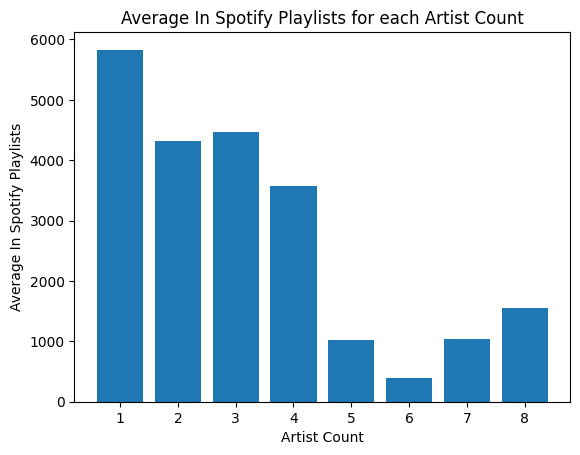

In [48]:
# Plot average in_spotify_playlists for each group in artist_count
average_df = dataset_cleaned.groupby('artist_count')['in_spotify_playlists'].mean().reset_index()
plt.bar(average_df['artist_count'], average_df['in_spotify_playlists'])
plt.xlabel('Artist Count')
plt.ylabel('Average In Spotify Playlists')
plt.title('Average In Spotify Playlists for each Artist Count')
plt.show()

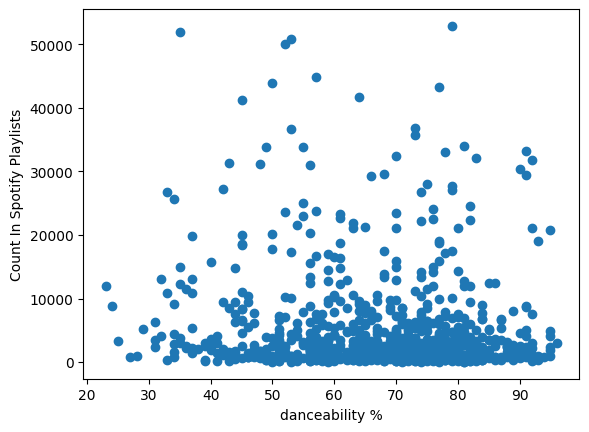

In [49]:
# Plot in_spotify_playlists vs danceability_%
plt.scatter(dataset_cleaned['danceability_%'], dataset_cleaned['in_spotify_playlists'])
plt.xlabel('danceability %')
plt.ylabel('Count In Spotify Playlists')
plt.show()

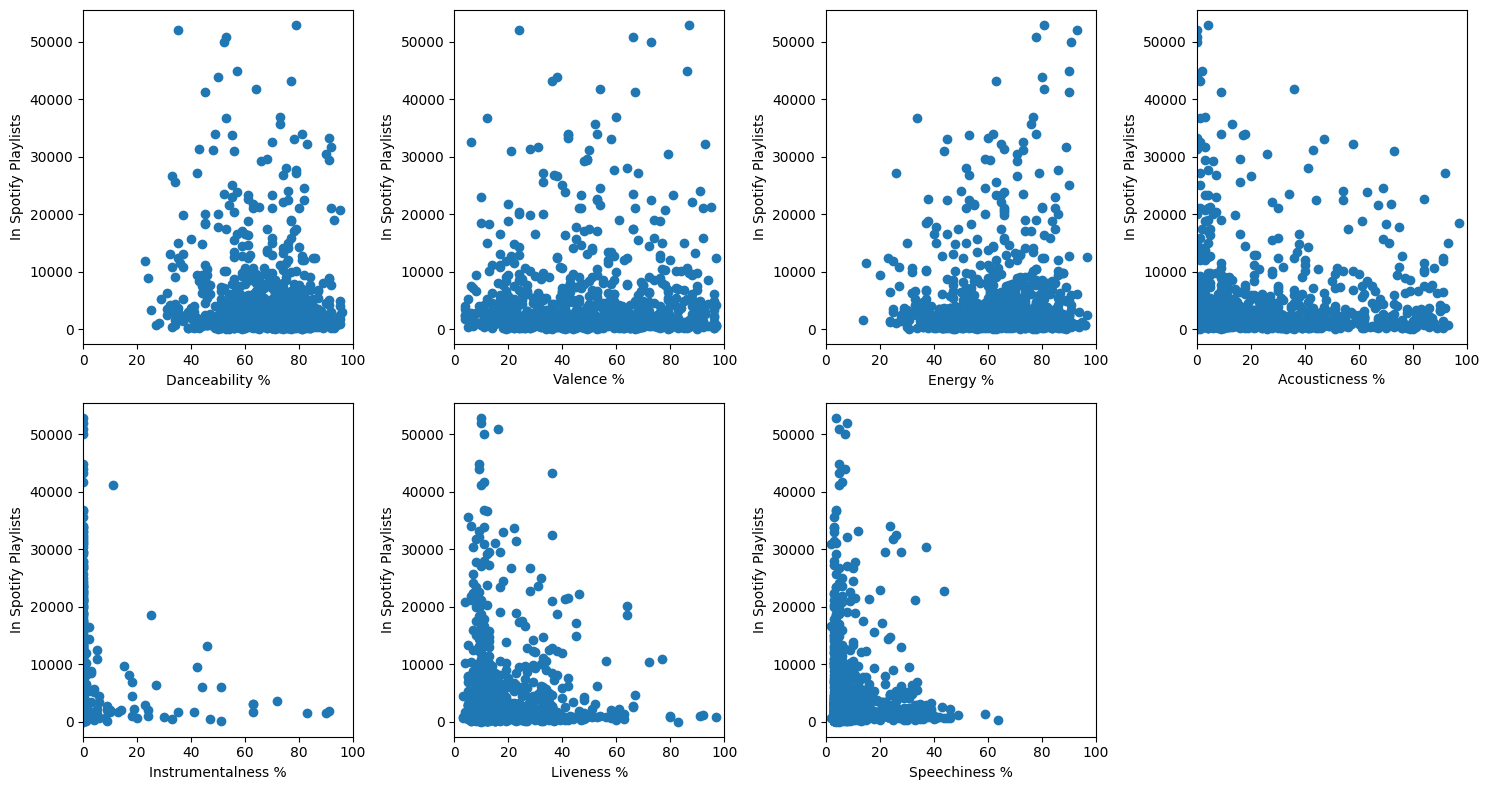

In [50]:
# Analyzing how much impact each of the song features has on "popularity" (in_spotify_playlists)

fig, axs = plt.subplots(2, 4, figsize=(15, 8))  # 2 rows, 4 columns
for ax in axs.flat:
    ax.set_xlim(0, 100)

axs[0, 0].scatter(dataset_cleaned['danceability_%'], dataset_cleaned['in_spotify_playlists'])
axs[0, 0].set_xlabel('Danceability %')
axs[0, 0].set_ylabel('In Spotify Playlists')

# Scatter plot for 'valence_%' vs 'in_spotify_playlists'
axs[0, 1].scatter(dataset_cleaned['valence_%'], dataset_cleaned['in_spotify_playlists'])
axs[0, 1].set_xlabel('Valence %')
axs[0, 1].set_ylabel('In Spotify Playlists')

# Scatter plot for 'energy_%' vs 'in_spotify_playlists'
axs[0, 2].scatter(dataset_cleaned['energy_%'], dataset_cleaned['in_spotify_playlists'])
axs[0, 2].set_xlabel('Energy %')
axs[0, 2].set_ylabel('In Spotify Playlists')

# Scatter plot for 'acousticness_%' vs 'in_spotify_playlists'
axs[0, 3].scatter(dataset_cleaned['acousticness_%'], dataset_cleaned['in_spotify_playlists'])
axs[0, 3].set_xlabel('Acousticness %')
axs[0, 3].set_ylabel('In Spotify Playlists')

# Scatter plot for 'instrumentalness_%' vs 'in_spotify_playlists'
axs[1, 0].scatter(dataset_cleaned['instrumentalness_%'], dataset_cleaned['in_spotify_playlists'])
axs[1, 0].set_xlabel('Instrumentalness %')
axs[1, 0].set_ylabel('In Spotify Playlists')

# Scatter plot for 'liveness_%' vs 'in_spotify_playlists'
axs[1, 1].scatter(dataset_cleaned['liveness_%'], dataset_cleaned['in_spotify_playlists'])
axs[1, 1].set_xlabel('Liveness %')
axs[1, 1].set_ylabel('In Spotify Playlists')

# Scatter plot for 'speechiness_%' vs 'in_spotify_playlists'
axs[1, 2].scatter(dataset_cleaned['speechiness_%'], dataset_cleaned['in_spotify_playlists'])
axs[1, 2].set_xlabel('Speechiness %')
axs[1, 2].set_ylabel('In Spotify Playlists')

# Remove empty subplot
fig.delaxes(axs[1, 3])

# Adjust
plt.tight_layout()

# Show the plot
plt.show()


Some early conclusions on previous charts:
- Danceability: no pattern observed.
- Valence: no pattern observed.
- Energy: popularity increases with energy in a subtle way, though most of samples stay under ~5000. Also, there is kind of peak between 70-80% after which popularity decreases.
- Acousticness: the higher the acousticness, the lower the popularity. This matches my expectation, since digital music is more popular nowadays. 
- Instrumentalness: higher density of popularity in the lower values of instrumentalness. People don't like pieces with many instruments.
- Liveness: higher density of popularity in the lower values of liveness. Live performances are not that popular.
- Speechiness: higher density of popularity in the lower values of speechiness. Less vocals songs go more poular.

In [51]:
# Coviariance matrix

# Normalization to mean=0, deviation=1
X = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
y = ['in_spotify_playlists']
selected_data = pd.DataFrame(StandardScaler().fit_transform(dataset_cleaned[X + y]))

covariance_matrix = selected_data.cov()
covariance_matrix

,0,1,2,3,4,5,6,7
0,1.001168,0.398272,0.166526,-0.240372,-0.099341,-0.093991,0.197061,-0.103400
1,0.398272,1.001168,0.347226,-0.066094,-0.144337,0.010843,0.040898,-0.021674
2,0.166526,0.347226,1.001168,-0.562316,-0.050382,0.103713,-0.025370,0.039713
3,-0.240372,-0.066094,-0.562316,1.001168,0.043372,-0.043249,-0.019844,-0.056280
4,-0.099341,-0.144337,-0.050382,0.043372,1.001168,-0.044920,-0.088306,-0.031734
5,-0.093991,0.010843,0.103713,-0.043249,-0.044920,1.001168,-0.015730,-0.049071
6,0.197061,0.040898,-0.025370,-0.019844,-0.088306,-0.015730,1.001168,-0.090449
7,-0.103400,-0.021674,0.039713,-0.056280,-0.031734,-0.049071,-0.090449,1.001168


In [52]:
# Correlation matrix

correlation_matrix = selected_data.corr()
correlation_matrix

,0,1,2,3,4,5,6,7
0,1.000000,0.397807,0.166331,-0.240092,-0.099225,-0.093882,0.196831,-0.103279
1,0.397807,1.000000,0.346820,-0.066017,-0.144168,0.010830,0.040850,-0.021648
2,0.166331,0.346820,1.000000,-0.561660,-0.050323,0.103592,-0.025340,0.039666
3,-0.240092,-0.066017,-0.561660,1.000000,0.043322,-0.043199,-0.019821,-0.056214
4,-0.099225,-0.144168,-0.050323,0.043322,1.000000,-0.044868,-0.088203,-0.031697
5,-0.093882,0.010830,0.103592,-0.043199,-0.044868,1.000000,-0.015711,-0.049014
6,0.196831,0.040850,-0.025340,-0.019821,-0.088203,-0.015711,1.000000,-0.090344
7,-0.103279,-0.021648,0.039666,-0.056214,-0.031697,-0.049014,-0.090344,1.000000


d:\TEMP\Varios\Ingenieria\AI\Misc\ML_misc\venv0\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


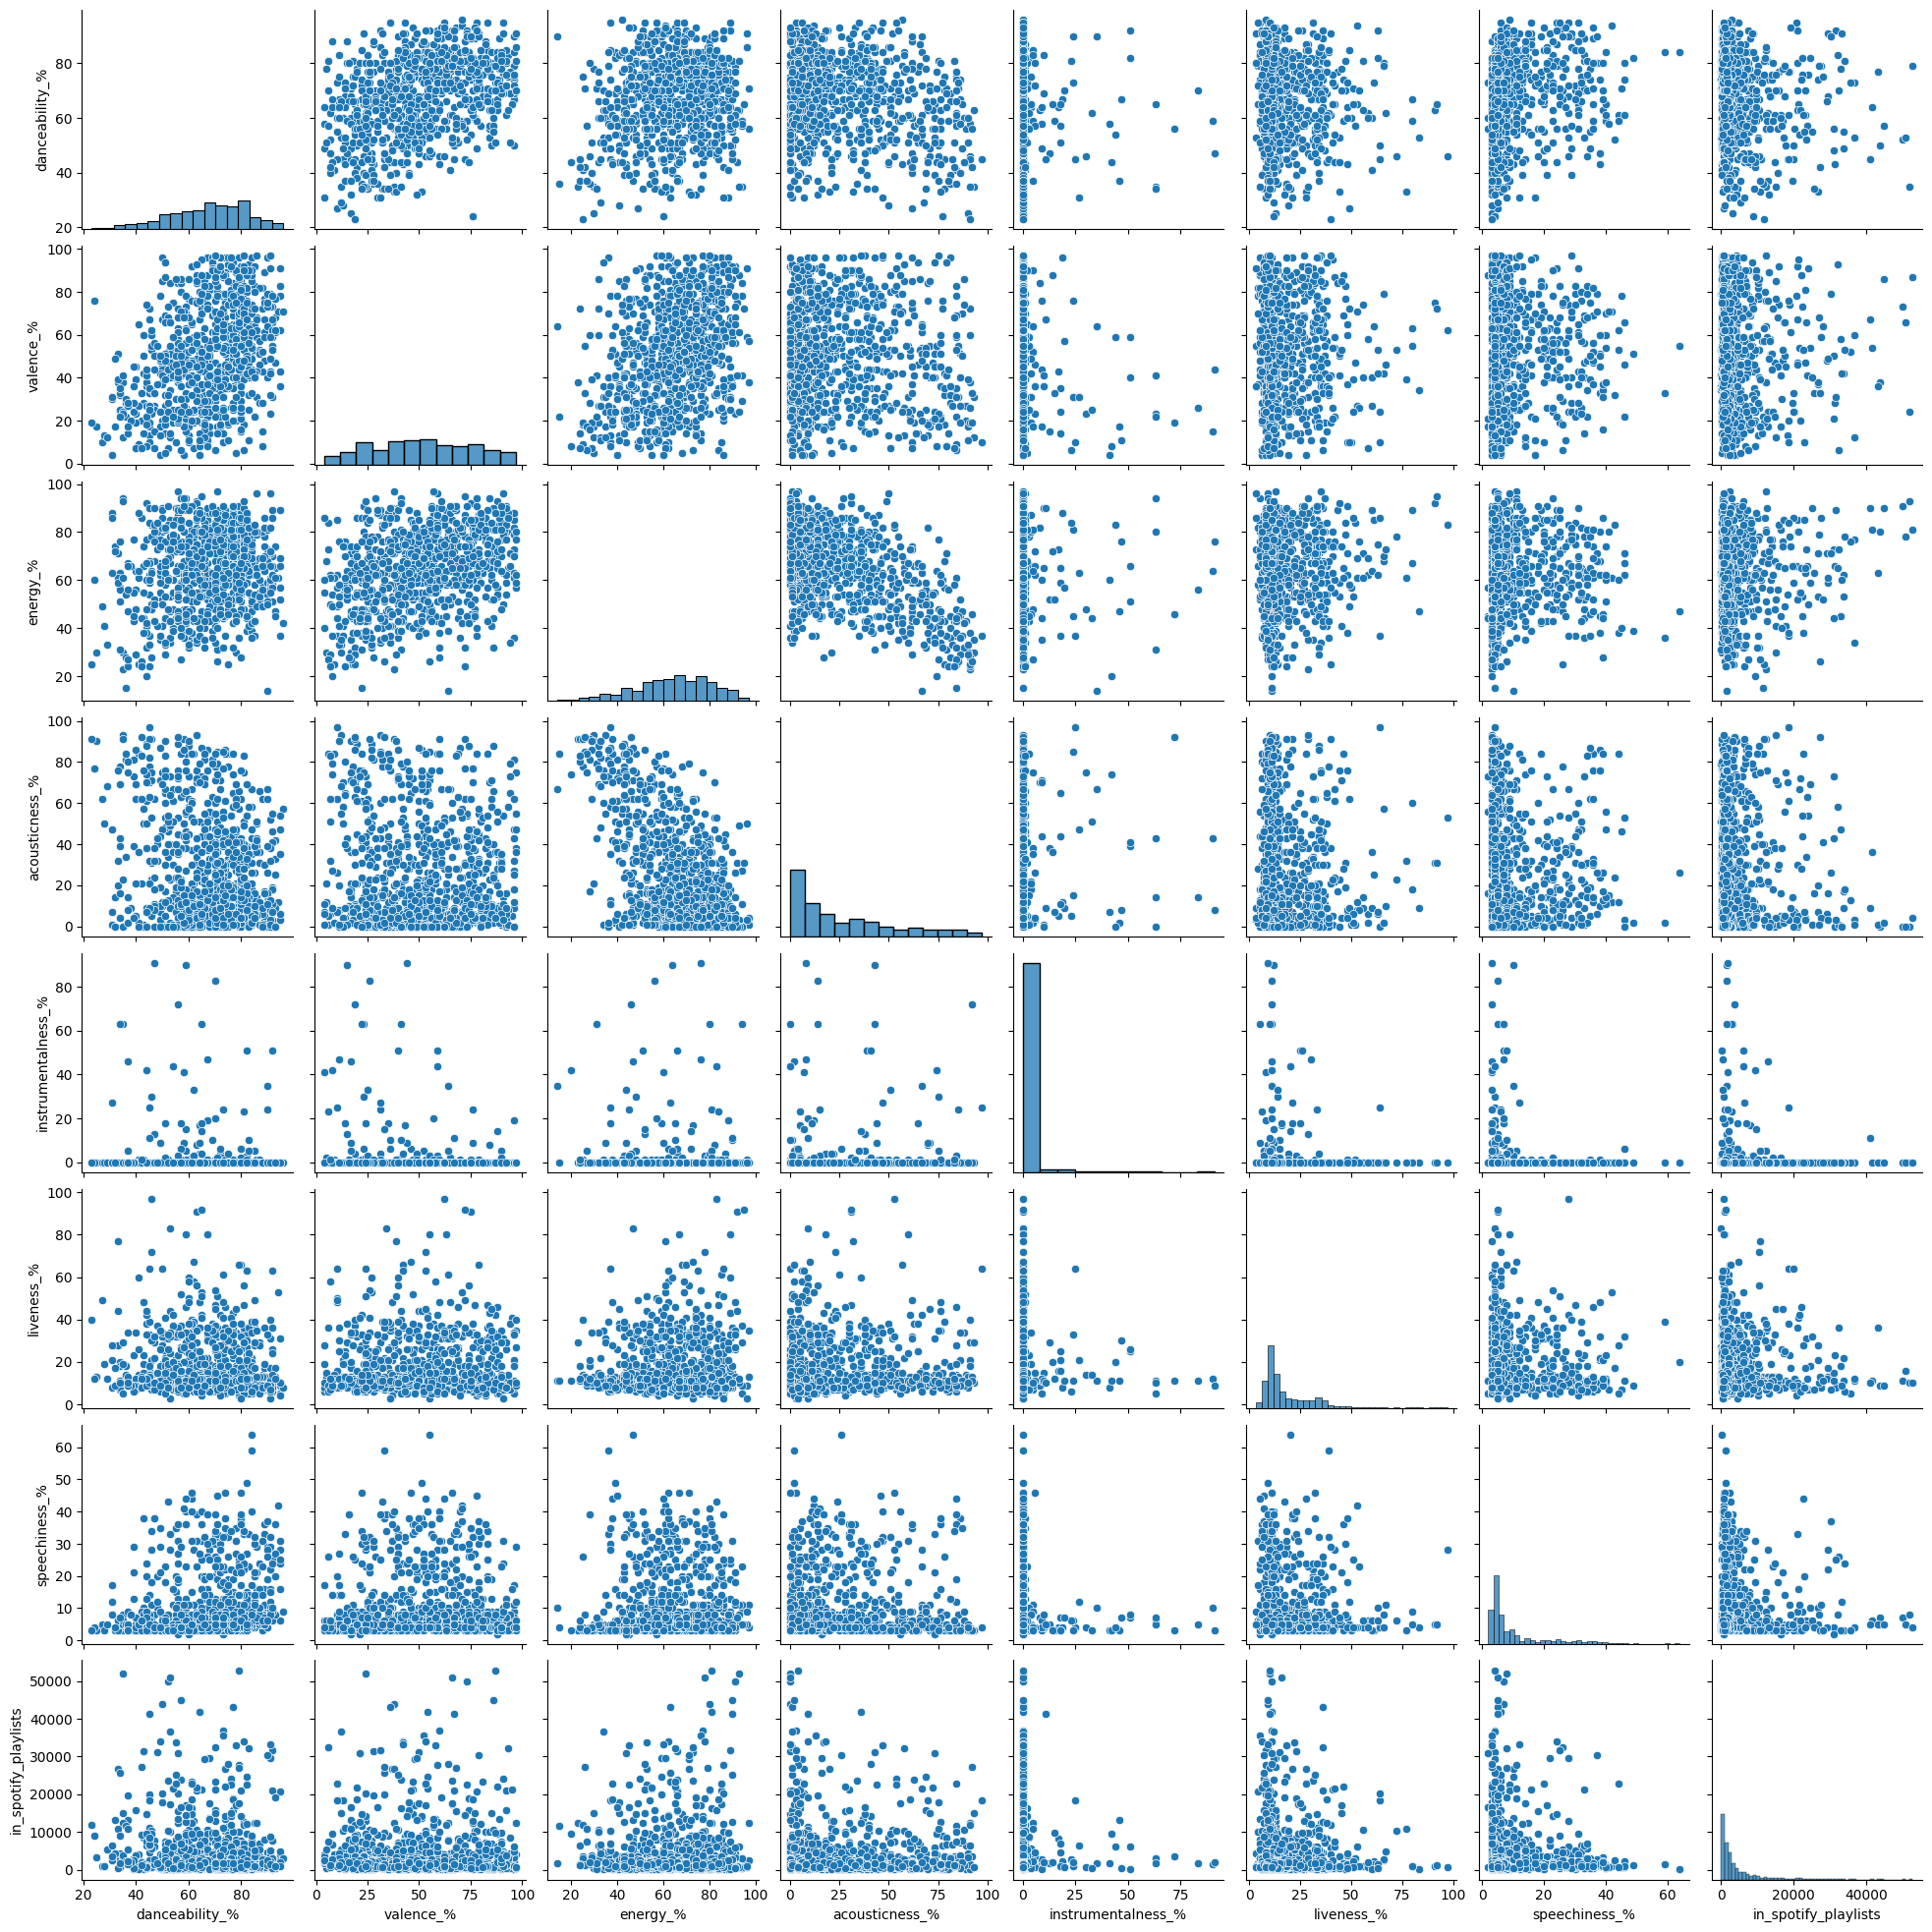

In [54]:
import seaborn as sns
sns.pairplot(selected_data)


Conclusions:
- No strong relationships found between in_spotify_playlists and the rest of variables analyzed.
- However, some second-order relationship could work for modeling in_spotify_playlists vs instrumentalness_%, liveness_% and speechiness_%